# Proyecto 1 - Series de Tiempo I
### Bruno Martinez - Cristóbal Cancino
### Prof. Ronny Vallejos
---

---
Problema 1
---
Considere la serie ```flu.dat``` que puede ser obtenida en el sitio
http://www.stat.pitt.edu/stoffer/tsa2/tsa2.html.

1. Transforme la serie adecuadamente para observar el efecto de la transformación en la media y la varianza

In [82]:
flu <- ts(read.table("https://www.stat.pitt.edu/stoffer/tsa2/data/flu.dat.txt"))

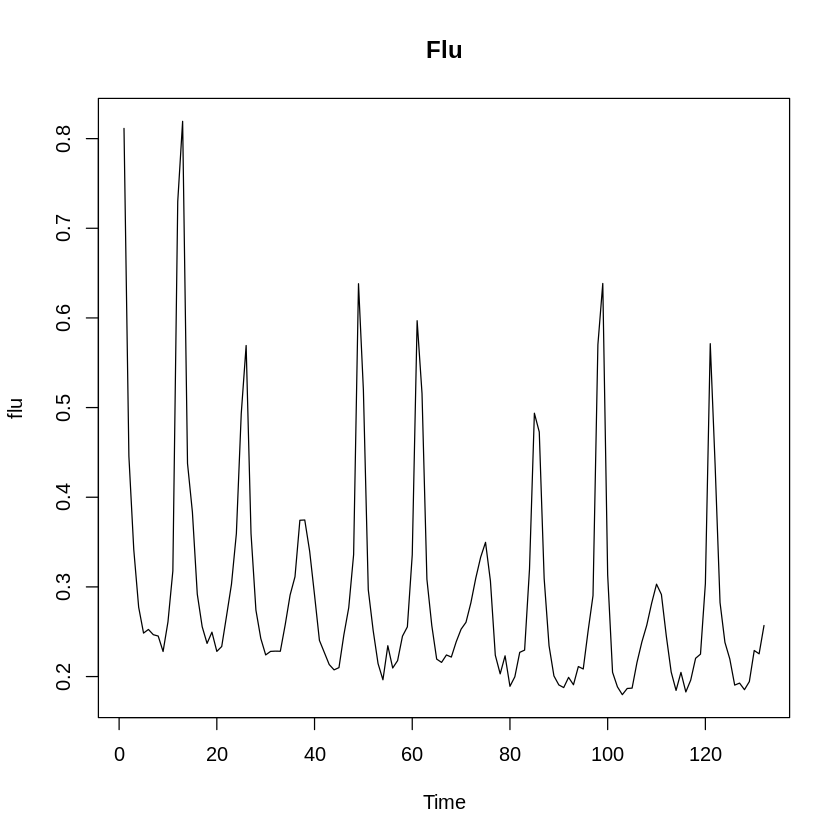

In [104]:
ts.plot(flu, main = 'Flu')

In [93]:
ma <- function(x, n = 5){filter(x, rep(1 / n, n), sides = 2)}
ma_flu = ma(flu)

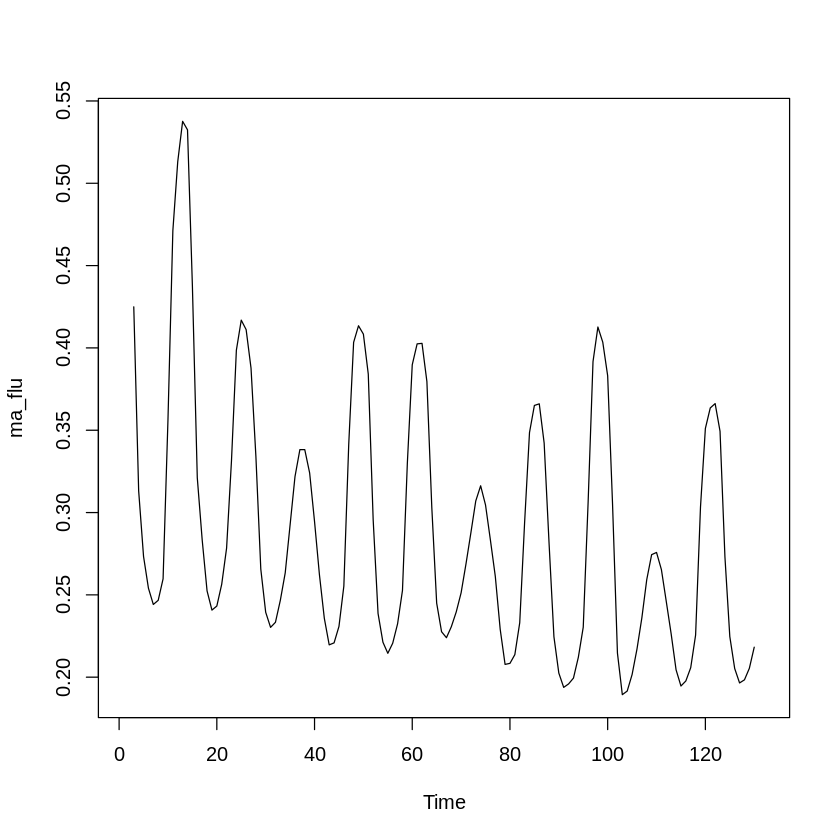

In [94]:
ts.plot(ma_flu)

In [98]:
mean(ma_flu, na.rm=TRUE)

[1] 0.2886393

In [97]:
mean(flu, na.rm=TRUE)

[1] 0.2918623

In [103]:
var(ma_flu, na.rm=TRUE)[1]

[1] 0.006155421

In [102]:
var(flu, na.rm=TRUE)[1]

[1] 0.01578173

2. Se propone un modelo de la forma
    $$Z_t = \sum_{j=0}^{\infty} \beta_j t^j + \epsilon_t$$
donde $\epsilon_t$ es un ruido blanco con varianza $\sigma^2$.
    1. Proponga un método que permita truncar la serie infinita que define el modelo, de tal modo que el modelo resultante sea de la forma
        $$Z_t = \sum_{j=0}^p b_j t^j + u_t,$$
   donde $p \in \mathbb{N}$. Es decir, proponga un método para estimar p.
    2. Estime $p$ usando los datos de la serie ```flu.dat```.
    3. Estime los parámetros del modelo: $\beta_j$, $j = 0,1,...,\hat p$, donde $\hat p$ es la estimación de $p$ propuesta en B.

3. Grafique la serie original y la serie ajustada en un mismo gráfico. Hay evidencia para aseverar que el modelo estimado es una buena representación de los patrones de la serie original? Justifique.

4. Ajuste un modelo de descomposición a la serie ```flu.dat```.

5. Ajuste un modelo de Holt-Winters a la serie ```flu.dat```.

---
# Problema 2

En este ejercicio es necesario obtener la serie asociada al calentamiento de la tierra descrito en grados centígrados entre los años 1900-1997. Esta serie es presentada en ```Shumway and Stoffer (2000), página 5```. Para bajar el archivo ```globtemp.dat```, encuentre el sitio web http://www.stat.pitt.edu/stoffer/tsa2/tsa2.html.

1. Grafique la serie ```globtemp.dat``` en el tiempo.

2. Use un modelo de suavizamiento exponencial simple para predecir la serie hacia el futuro. Considere un valor apropiado para $\alpha$.

3. Describa las bondades y limitaciones del modelo usado en los puntos anteriores.

4. A partir de la serie original obtenga una serie sin tendencia.

5. Estime un modelo de regresión de la forma
$$Z_t = \beta_0 + \beta_1 t + \epsilon_t,$$
para la serie ```globtemp.dat```, donde $\epsilon_t$ es una colección de variables aleatorias no correlacionadas en media cero y varianza $\delta^2$. ¿El modelo ajustado luce similar a la serie original?

6. Descomponga la serie ```globtemp.dat``` en tres partes: una tendencia, una parte estacional y una componente residual. Describa que observa.

---
Problema 3
---


Al analizar cierta serie de tiempo trimestral se usó un método ingenuo obteniéndose:

1. Ecuación de tendencia $T(t) = 84.65 + 4.71t$.
2. Serie de residuos $W(t) = Y(t) - Z(t)$.
| Trimestre | 1997   | 1998   | 1999   | 2000   | 2001 |   |   |   |   |
|:---------:|:------:|:------:|:------:|:------:|:----:|:---:|:---:|:---:|:---:|
| 1         | -      | 20     | 15     | 13.75  | 8.75 |   |   |   |   |
| 2         | -      | -6.25  | -7.50  | -7.50  | 2.50 |   |   |   |   |
| 3         | -11.25 | -11.25 | -21.50 | -13.75 | -    |   |   |   |   |
| 4         | 0.95   | 1.05   | 1.11   | 1.05   | -    |   |   |   |   |
En base a los resultados de 1. y 2., dado que $t = 1$ corresponde al primer trimestre de 1997, prediga los valores de la serie en cada uno de los trimestres de 2002.

**Solución.**

Primero obtendremos los valores de los $e_i$, con $i = 1,...,4$. Note que $e_i$ corresponde al promedio de los $W(t)$ de cada trimestre.
Calculando:

* $e_{1} = (20+15+13.75+8.75)/4 = 14.38$
* $e_2 = (-6.25-7.50-7.50+2.50)/4 = -4.69$
* $e_3 = (-11.25-11.25-21.50-13.75)/4 = -14.44$
* $e_4 = (0.95+1.05+1.11+1.05)/4 = 1.04$

Calculando el promedio de los $e_i$, para $i=1,...,4$

$$\overline{e} = (14.38-4.69-14.44+1.04)/4 = -0.93$$

Por otra parte la estimacion de la componente estacional, está dada por:

* $\hat{E_{1}} = e_1 - \overline{e} = 15.31$
* $\hat{E_{2}} = e_2 - \overline{e} = -3.76$
* $\hat{E_{3}} = e_3 - \overline{e} = -13.51$
* $\hat{E_{4}} = e_4 - \overline{e} = 1.97$

Note que la tendencia viene dada por $T_{t} = 84.65 +4.71*t$, y dado que nos piden predecir los valores de $Z$ para el año 2002, entonces tendremos que calcular los trimestres 21,22,23,24. En efecto:

* $\hat{T_{21}} = 183.56$
* $\hat{T_{22}} = 188.27$
* $\hat{T_{23}} = 192.98$
* $\hat{T_{24}} = 197.69$

Finalmente , calculando lo pedido (los valores de la serie para cada trimestre del año 2002).

* $\hat{Z_{21}} = \hat{T_{21}} + \hat{E_{1}} = 198.87$
* $\hat{Z_{22}} = \hat{T_{22}} + \hat{E_{2}} = 184.51$
* $\hat{Z_{23}} = \hat{T_{23}} + \hat{E_{3}} = 179.47$
* $\hat{Z_{24}} = \hat{T_{24}} + \hat{E_{4}} = 199.66$

---
Problema 4
---

Considere una serie de tiempo $\lbrace Z_t : t \in T \rbrace$ descrita por la ecuación:
$$Z_t = \beta_0 + \beta_1 t + \beta_2 t^2 + S_t + \epsilon_t$$
donde $\beta_0$, $\beta_1$ y $\beta_2$ son parámetros desconocidos del modelo, $S_t$ es un efecto estacional conocido y $\epsilon_t$ es un ruido aleatorio con media y varianza constante. Determine las ecuaciones que permiten estimar los parámetros $\beta_0$, $\beta_1$ y $\beta_2$.